# Dimensionality reduction analysis

After applying the different clustering algorithms, we now look at ways to improve the obtained results. One way to do so is by applying dimension reduction techniques such as Principal Component Analysis (PCA) and Canonical Correlation Analysis (CCA).


**<font color='red'>PCA:</font>** This method is used to reduced the dimensions of the data. In fact, sometimes we have variables that do not give any information about the data and thus removing these variables can lead to better results.  

**<font color='red'>CCA:</font>** This method is used to detect correlations between different subgroups of data. In fact, sometimes we have variables that are so strongly correlated that reducing the dimensions using linear combinations between the correlated variables can imporove the results
It is **important to note that we will NOT use the labels when applying PCA and CCA.**

___


Therefore, in this part of the project, you will apply both PCA and CCA on the data you chose in the clustering part. Afterwards, you will apply the clustering method that gave the best results in TD2_3 on the reduced dataset you obtained from the PCA step.

## Mount Drive

**For google colab users only**

In [3]:
import os
from google.colab import drive

drive.mount('/content/drive')

# Change to the directory to where your files are
os.chdir('drive/My Drive/')



ModuleNotFoundError: No module named 'google'

## Import Libraries

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Load the dataset, separate data from classes



Load the dataset you are using in your project and separate the data from the class.

**<font color='red'>N.B:</font>** If you have applied some preprocessing steps (missing value replacement, factorize), please used the dataset you obtained after all the steps (you should have saved your dataset in notebook TD2_3.ipynb) without the normalization step.





In [7]:
df = pd.read_csv("ParisHousingClass.csv",header = 0)

#Discriminer les deux données
df_nominal = df.loc[:, ["category"]]

df_numeric = df.drop(["category"], axis=1)


In [8]:
#Traitement donnée nominal 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
missing_values = df_numeric.isnull().sum()
imputer = SimpleImputer(missing_values= np.nan , strategy='median')
df_numeric_traite = pd.DataFrame (imputer.fit_transform(df_numeric), columns=df_numeric.columns)
imputer.fit(df_numeric_traite)


SimpleImputer(strategy='median')

In [9]:
#Traitement donnée catégoriel 
import copy
df_nominal_traiteV1 = copy.deepcopy(df_nominal)
df_nominal_traiteV1['category'] = pd.factorize(df_nominal['category'])[0]
imputer = SimpleImputer(missing_values= -1 , strategy='most_frequent')
df_nominal_traiteV2 = pd.DataFrame (imputer.fit_transform(df_nominal_traiteV1), columns=df_nominal_traiteV1.columns)

imputer.fit(df_nominal_traiteV2)

SimpleImputer(missing_values=-1, strategy='most_frequent')

In [10]:
#Fusion des donnée nominal et catégoriel 
df_trans = pd.concat([df_nominal_traiteV2 , df_numeric_traite], axis=1)

df_trans.shape

(10000, 18)

## Part 1: Apply PCA


##### We start by scaling the data so that each feature has a single unit variance.  


**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale both continuous and numerical variables.
PCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

In [11]:
# Use StandardScaler
from sklearn.preprocessing import StandardScaler

df = df_trans
# instanciate scaler object
scaler = StandardScaler()

# fit scaler to our data
scaler.fit(df)

# scale our data
data_scaled = scaler.transform(df)


##### We then instantiate a PCA object.

The main parameter of this method is the max number of components. In this project, we will choose it to be equal to the max number of variables in the data.


In [12]:
from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA(n_components=18) 

# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)

### Interpreting the components

The next step is to choose the number of components to keep.

##### Plot the explained variance of each component using the corrected variance.

In [13]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values 
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[2.00376819e+00 1.65952567e+00 1.07712401e+00 1.05717054e+00
 1.03498083e+00 1.02123449e+00 1.01265137e+00 1.00888843e+00
 1.00129620e+00 9.94271449e-01 9.85280542e-01 9.79685643e-01
 9.68800385e-01 9.63658843e-01 9.53118402e-01 9.35461478e-01
 3.44883495e-01 2.17315960e-07]

Corrected variance
[2.00396859e+00 1.65969164e+00 1.07723173e+00 1.05727627e+00
 1.03508434e+00 1.02133662e+00 1.01275265e+00 1.00898933e+00
 1.00139634e+00 9.94370886e-01 9.85379080e-01 9.79783621e-01
 9.68897275e-01 9.63755219e-01 9.53213724e-01 9.35555034e-01
 3.44917987e-01 2.17337694e-07]


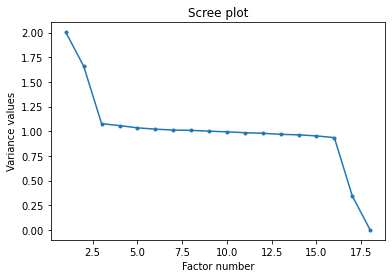

In [14]:
# plot the explained variance of each component
p = data_pca.shape[1] # number of components
plt.plot(np.arange(1,p+1),corrected_variance, marker='.')
plt.title("Scree plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

##### Plot the cumulative variance of the components based on the explained variance ratio.

In [15]:
pca.explained_variance_ratio_*100
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 11.13093229,  20.34959739,  26.33302125,  32.20560362,
        37.95492212,  43.62787969,  49.25315805,  54.85753328,
        60.41973367,  65.94291157,  71.41614498,  76.85829873,
        82.23998487,  87.59310974,  92.88768247,  98.08417098,
        99.99999879, 100.        ])

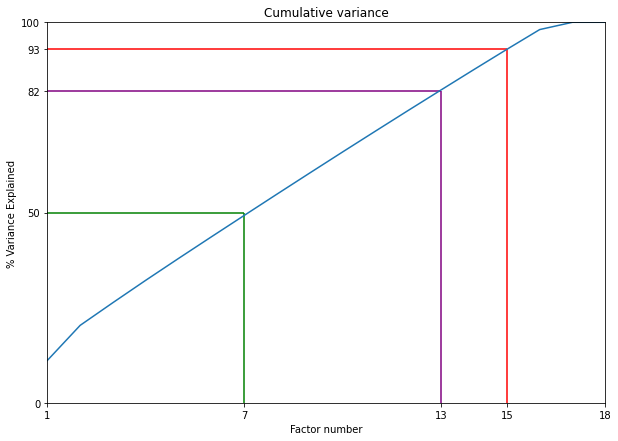

In [ ]:
# plot the cumulative variance
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=93.0, xmin=0, xmax=15, color='red')
plt.vlines(x=15.0, ymin=0, ymax=93,color='red')

plt.hlines(y=82.0,xmin=0, xmax=13, color='purple')
plt.vlines(x=13.0, ymin=0, ymax=82, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=7, color='green')
plt.vlines(x=7.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,18)
plt.yticks([0,50,82,93,100])
plt.xticks([1,7,13,15,18])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()



##### How many components will you keep? Explain your choice.

Je décide de réduire ma dataset de 13 élement. Cependant, il serais plus interessant d'envisager à garder toutes les variables car la réduction de dimension n'est pas assez intéréssente. 


**Note:** If you do choose to keep all components in your analysis, you do not perform any dimension reduction.

##### Create your reduced dimensionality dataset by only keeping the components you chose to keep in the above question.

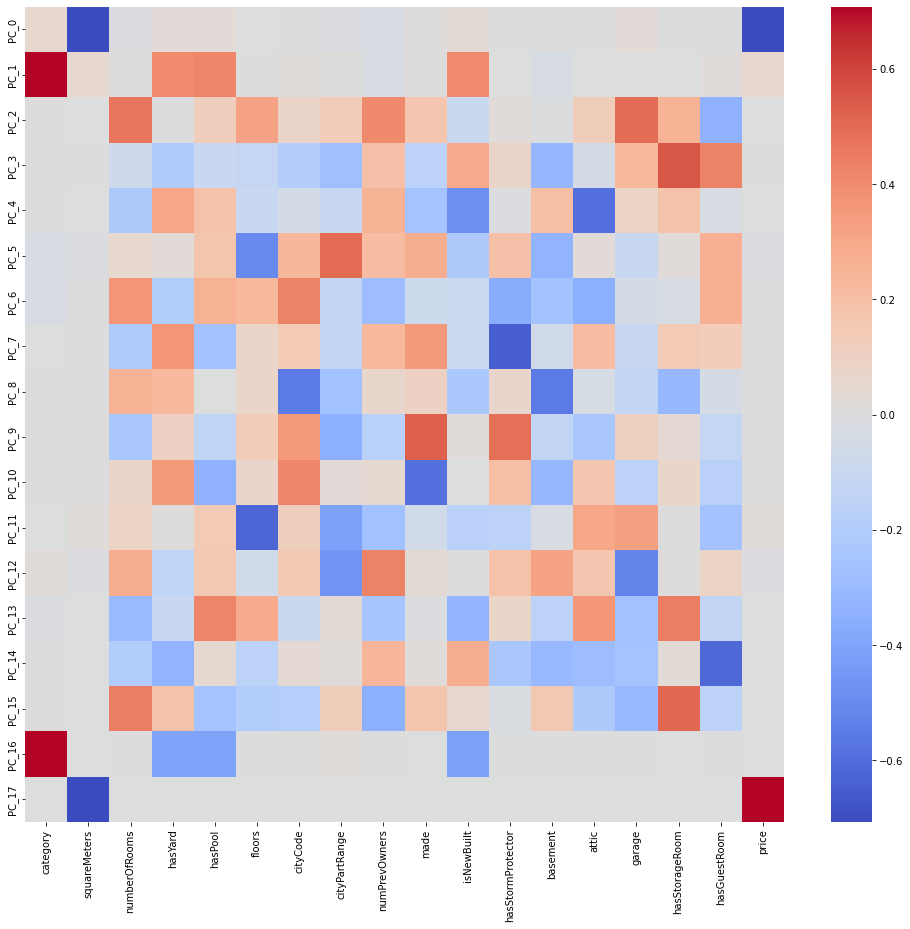

In [17]:
data = df_trans
components = pd.DataFrame(pca.components_, columns=data.columns, index=[f"PC_{i}" for i in range(len(pca.components_))])

plt.figure(figsize=(17,15))
sns.heatmap(components,cmap='coolwarm',)
plt.show()

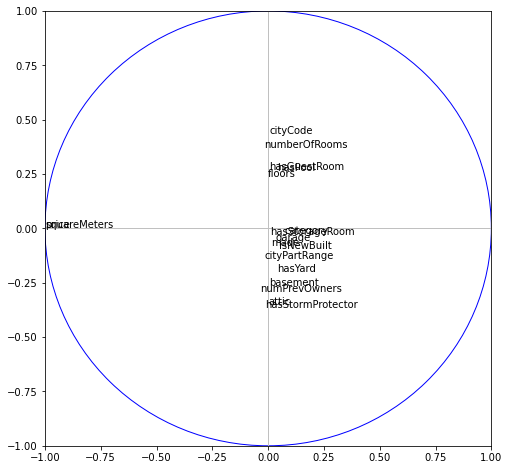

In [24]:
#analyse des variables a garder avec le cercle de corélation 
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]
 

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
composanteA = 0
composanteB = 6
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,composanteA],corvar[j,composanteB]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### What is the inertia percentage explained by the components you kept *(le pourcentage d’inertie expliquée par le premier axe factoriel)*?

What does it mean?

In [ ]:
#Le pourcentage d'inertie expliquée par le permier axe factoriel correspond 
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

##### Calculate the contribution of the first individual to the first component *(la contribution du premier individu au premier axe factoriel)*.

##### Calculate the quality of representation of this individual in the map made of the first factorial axis *(la qualité de représentation de cet individu dans le plan constitué du premier axe factoriel)*.

What can you deduce?

### Variable representation

#### Compute the correlation between the principal components and the variables

##### Print the correlation matrix.

In [ ]:
# Print the correlation matrix "variables x factors"
print(corvar)

[[ 7.12359410e-02  9.05684417e-01  4.84881554e-03  1.55265925e-03
   8.99048971e-03 -2.54560189e-02 -2.27595494e-02 -1.62155204e-03
  -6.16317169e-03  6.46190879e-04 -7.66028396e-03 -4.29541802e-03
   1.87667557e-02 -1.22949850e-02  6.99553167e-03  3.98596210e-03
   4.15814990e-01  9.72965508e-10]
 [-9.97514696e-01  6.55229605e-02 -3.20653898e-03  4.77984759e-03
  -2.72538169e-03 -1.16837059e-02  1.66684666e-03  5.42377275e-03
  -8.78152501e-03  1.00753847e-02 -1.02058309e-02  1.33470669e-02
  -1.33655696e-02 -2.21255670e-04 -4.67051631e-03 -5.82389766e-04
  -2.46774572e-04 -3.29650356e-04]
 [-1.90469503e-02  3.73546791e-03  4.82425390e-01 -7.52071782e-02
  -2.24143562e-01  5.53771230e-02  3.71791147e-01 -2.15864828e-01
   2.62956537e-01 -2.29433036e-01  7.32654837e-02  8.61644856e-02
   2.76182448e-01 -2.95816688e-01 -1.96936294e-01  4.31454344e-01
   9.22082565e-04 -8.29608135e-10]
 [ 3.92866850e-02  5.18991597e-01 -5.63987136e-03 -2.16819637e-01
   3.13371917e-01  2.28080520e-02 -2.

##### Plot the correlation circle

NameError: name 'data' is not defined

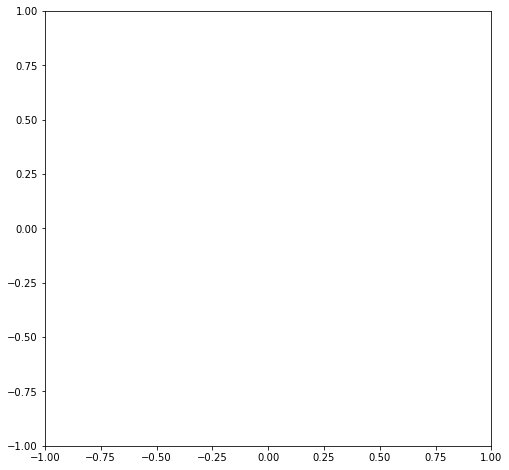

In [ ]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### Interpret the obtained results

## Applying clustering on the newly created dataset.

Recall in TD2_3.ipynb, you applied different clustering algorithms on your dataset and analyzed which method gave the best results on your dataset.

##### Apply this clustering method to the dataset you obtained after applying PCA and performing dimension reduction.

##### Using the same metrics you used in TD2_3.ipynb, compare the results obtained with this method to the real classes.

##### In your opinion, did dimensionality reduction help you in getting better results or not?

## Part 2: Apply CCA

Next steps:
   - Apply CCA /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyze the correlation circle *(graphe des variables)*
   - Analyze the observation graph *(graphe des individus)*

**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale use continuous and numerical variables.
CCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

### Choice of the two groups

##### Show the correlation matrix of the data

##### Split your data into two groups p and q

##### How did you choose your two groups?

### Apply CCA

CCA with scikit-learn uses a very similar process to other preprocessing functions that come with scikit-learn. We instantiate a CCA object, find the  components (linear combinations of the variables) using the fit method, then apply the dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the CCA object.

Check the scikit-learn documentation for CCA. Do you need to use the scaled or unscaled data to apply CCA?



##### Apply CCA

##### Print the first two components

##### Print the correlation matrix between the first two components

##### What can you conclude?

### Results visualization and interpretation

#### Variable representation

##### Compute the correlation between the components and the variables

[*aide: utiliser les matrices centrées-réduites*]

##### Show the correlation circle

##### Interpret the obtained results

#### Individual visualization

##### Show the individuals representation

##### Interpret the obtained results

### CCA Conclusion
Based on your visualizations, do you think it would be useful to use the CCA results to reduce the dimensionality of your dataset before applying some form of clustering method, like you did with PCA? Why / why not?